<a href="https://colab.research.google.com/github/charleshart0301/DSPS_cHart/blob/main/HW8/Charles_higgsbosonSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import os
import json
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import ensemble
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

In [2]:
#mount your google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%pylab inline
pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/fbb.mplstyle")

Populating the interactive namespace from numpy and matplotlib


## Remember tasks are not completed if you do not comment on the results and include captions

# Task 1 : data ingestion

- Download the Higgs boson data from Kaggle (programmatically within the notebook)

see how I did it in the Titanic Trees notebook https://github.com/fedhere/DSPS_FBianco/blob/main/CodeDemos/titanictree.ipynb

find the correct API link here https://www.kaggle.com/c/higgs-boson/data. The command is `!kaggle competitions download......` (you may need to agree to the terms of condition of the higgs boson challenge on the kaggle webpage)


In [4]:
pip install kaggle

In [5]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [8]:
ls kaggle.json

kaggle.json


In [9]:
!chmod 600 kaggle.json

In [10]:
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [11]:
!kaggle datasets list

ref                                                             title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset    Global Earthquake-Tsunami Risk Assessment Dataset       16151  2025-10-01 16:35:53.273000          18228        620  1.0              
jaderz/hospital-beds-management                                 Hospital Beds Management                                47583  2025-10-03 09:21:58.590000          15379        357  1.0              
ahmadrazakashif/bmw-worldwide-sales-records-20102024            BMW Worldwide Sales Records (2010–2024)                853348  2025-09-20 14:39:45.280000          20186        396  1.0              
umutt

In [ ]:
!mkdir dsps

mkdir: cannot create directory ‘dsps’: File exists


In [12]:

cd dsps

/content/drive/MyDrive/dsps


In [11]:
!ls dsps

HiggsBosonCompetition_AMSMetric_rev1.py  test.csv      training.zip
higgs-boson.zip				 test.zip
random_submission.zip			 training.csv


In [12]:
!kaggle competitions download -c higgs-boson -p dsps

higgs-boson.zip: Skipping, found more recently modified local copy (use --force to force download)


In [13]:
!unzip dsps/higgs-boson.zip -d dsps

Archive:  dsps/higgs-boson.zip
replace dsps/HiggsBosonCompetition_AMSMetric_rev1.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [14]:
!unzip dsps/training.zip -d dsps

Archive:  dsps/training.zip
replace dsps/training.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [15]:
!unzip dsps/test.zip -d dsps

Archive:  dsps/test.zip
replace dsps/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [14]:
cd dsps

/content/drive/MyDrive/dsps/dsps


In [15]:
ls

HiggsBosonCompetition_AMSMetric_rev1.py  test.csv      training.zip
higgs-boson.zip                          test.zip
random_submission.zip                    training.csv


In [81]:
#use the training dataset and make your own trainng test set later
higgsdata = pd.read_csv("training.csv")

# Task 2: data exploration

In [82]:
higgsdata.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [83]:
higgsdata.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


do everything else you need to explore the data.... (I can think of 4 more things we have done together)

In [84]:
higgsdata.shape

(250000, 33)

In [85]:
higgsdata.dropna(inplace = True)

In [86]:
#This code is meant to iterate through the entire dataframe and remove the no value portions. It takes forever to run, and I don't think it's super necessary.
"""
for j in higgsdata.columns:
  for i in higgsdata.index:
    if higgsdata.loc[i, j] == -999.0:
      higgsdata.drop(i, axis=0, inplace=True)
"""

KeyboardInterrupt: 

# Task 3: data preparation


- Read in the trainind data. Extract the target variables. Split the provided training data into a training and a test set.

The last 2 columns are what you want to predict: "weight" and "label".
Remove them from the input data (along any other variable you should remove) and create a separate variable `labels` and a separate variable `weights`, which will be your target variables for, respectively, classification and regression.



 you will use two target variables (you can read more about the data at https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf): find the corresponding columns of the DF and save them as labels and weights respectively

In [ ]:
#higgsdata['Label'] = higgsdata['Label'].map({'s': 1, 'b': 0})

In [17]:
# 's' stands for signal, 'b' for background. You want to find new particles, i.e. "signal"
labels = higgsdata['Label']
labels

,Label
0,s
1,b
2,b
3,b
4,b
...,...
249995,b
249996,b
249997,s
249998,b


In [18]:
# the weight of the particle
weights = higgsdata['Weight']
weights

,Weight
0,0.002653
1,2.233584
2,2.347389
3,5.446378
4,6.245333
...,...
249995,4.505083
249996,2.497259
249997,0.018636
249998,1.681611


In [25]:
higgsdata = higgsdata.drop(["EventId", "Label", "Weight"], axis=1)

use the "training.csv" file, but create your own train/test sets

In [26]:
train_x, test_x, train_y, test_y = train_test_split(higgsdata, labels, test_size=0.75, random_state=344)

In [27]:
train_regress_x, test_regress_x, train_regress_y, test_regress_y = train_test_split(higgsdata, weights, test_size=0.75, random_state=344)
#EC predict weight

#Task 4: answer the question (you, not an AI...) why did I not ask you to scale the data like we did in the cluster models?

For the clustering HW, we were comparing the different parameters against each other which is why we needed to scale the data, becasue otherwise the variables may not be 'compatitable'. For trees, however, each feature in the dataset is only going to be compared to the target variable together.

# Task 5: tree-based classifications

Use a Random Forest and a Gradiend Boosted Tree Classifier model to predict the `label` of the particles, i.e. if a particle is `Signal` or `Background`. Get the score of each model on both the training and test set, compare them training and test results and comment on the result for each model (adjust the hyperparameters if you need to)


In [28]:
# Look at parameters used by our current forest
rf = ensemble.RandomForestClassifier(random_state = 344)
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 344, 'verbose': 0, 'warm_start': False}


In [29]:
#now control some hyperparameters
rf = ensemble.RandomForestClassifier(criterion = 'gini', max_depth=3, random_state=344)

In [30]:
gbt = ensemble.GradientBoostingClassifier(max_depth = 3, random_state=344)

In [31]:
rf.fit(train_x, train_y)


RandomForestClassifier(max_depth=3, random_state=344)

In [32]:
gbt.fit(train_x, train_y)

GradientBoostingClassifier(random_state=344)

In [33]:
print(f"training accuracy {rf.score(train_x, train_y):.2f}, testing accuracy {rf.score(test_x,  test_y):.2f}")

training accuracy 0.80, testing accuracy 0.80


In [34]:
print(f"training accuracy {gbt.score(train_x, train_y):.2f}, testing accuracy {gbt.score(test_x,  test_y):.2f}")

training accuracy 0.84, testing accuracy 0.83


Both scores are fairly accurate and close together meaning that the data is fitted well.

# Task 6: model evaluation

calculate the  scores for the training and test sets and compare etc

In [35]:
print(f"the RF scores on the training test is {...}, on the test is {...}")
print("this indicates.....")
print(f"the GBT scores on the training test is {...}, on the test is {...}")
print("this indicates....")
#Did this above

the RF scores on the training test is Ellipsis, on the test is Ellipsis
this indicates.....
the GBT scores on the training test is Ellipsis, on the test is Ellipsis
this indicates....


**Comment** is your model performing well? is it .... overfitting?

- Produce a confusion matrix for each model and compare them






In [33]:
# I creaded this function (mostly copied from sklearn examples).
# You can use it to create the confusion matrix, make sure you pass appropriate label

def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title='', labels=["P", "N"],
                          cmap=plt.cm.bone):
    """
    Plots a confusion matrix.

    Args:
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.
        normalize (bool, optional): If True, normalize the confusion matrix. Defaults to False.
        title (str, optional): Title of the plot. Defaults to ''.
        labels (list, optional): List of labels for the classes. Defaults to ["P", "N"].
        cmap (matplotlib.colors.Colormap, optional): Colormap for the plot. Defaults to plt.cm.bone.
    """
    if normalize:
          title = title + ' Normalized confusion matrix'
    else:
          title = title + ' Confusion matrix, without normalization'
    # Compute confusion matrix
    if normalize:
      cm = confusion_matrix(y_true, y_pred, normalize='all')
    else:
      cm = confusion_matrix(y_true, y_pred)
    # plot it
    fig, ax = plt.subplots(1, 1)
    fig.subplots_adjust()
    im = ax.imshow(np.rot90(cm), cmap=cmap)
    #ax_divider = make_axes_locatable(ax)
    # add an axes to the right of the main axes.
    plt.xticks([0, 1], labels=labels[::-1])

    plt.text(0,1, cm[0,0], ha='center', c="k" if cm[0,0] > 0.1 * cm.sum() else "w")
    plt.text(0,0, cm[0,1], ha='center', c="k" if cm[0,1] > 0.1 * cm.sum() else "w")
    plt.text(1,1, cm[1,0], ha='center', c="k" if cm[1,0] > 0.1 * cm.sum() else "w")
    plt.text(1,0, cm[1,1], ha='center', c="k" if cm[1,1] > 0.1 * cm.sum() else "w")
    plt.ylim(-0.5,1.5)
    plt.yticks([0,1], labels=labels)
    plt.xlabel("prediction")
    plt.ylabel("truth")
    plt.title(title)
    #cax = ax_divider.append_axes("right", size="10%", pad="2%")
    cb = plt.colorbar(im, )#cax=cax)

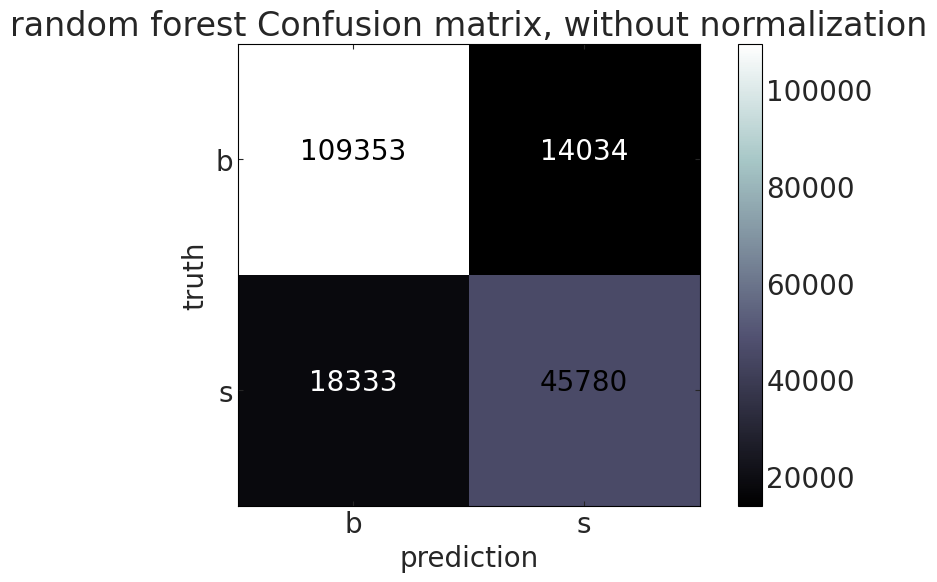

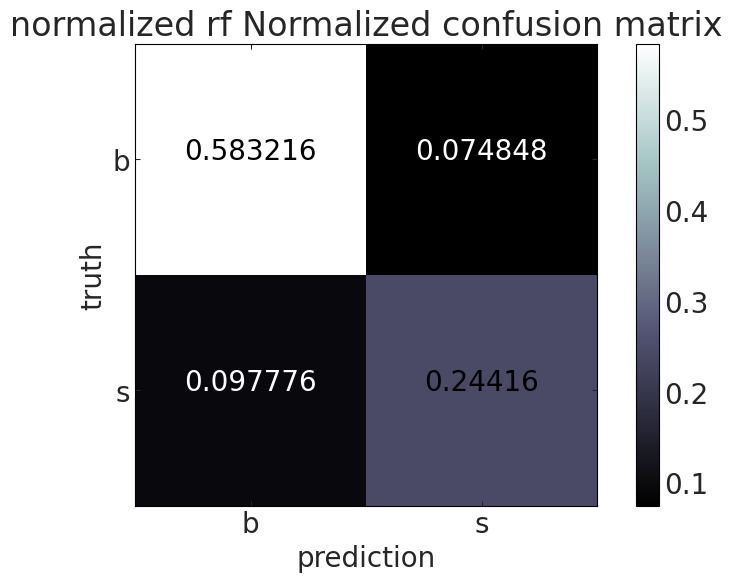

In [78]:
#for RF
#Probably have to come back to this and figure out the function
plot_confusion_matrix(rf.predict(test_x), test_y, title="random forest", labels = ['s', 'b'])
plot_confusion_matrix(rf.predict(test_x), test_y, normalize=True,
                  title= "normalized rf",labels = ['s', 'b'])

Figure 1. This figure contains two confusion matrixes. A confusion matrix shows the efficiency of the tree method being performed on the data. On the bottom axis, is the target variable that has been predicted on the tree. On the vertical axis is the true value that that variable had. It shows the amount of correctly and incorrectly predicted values. The normalized matrix is simply a normalized version of the original. This was done with the random forest method from sklearn where a bunch of trees are run in parallel and vote together on which value they predict. These matrices show much higher values on the diagonals meaning it was right much more often than it was wrong.

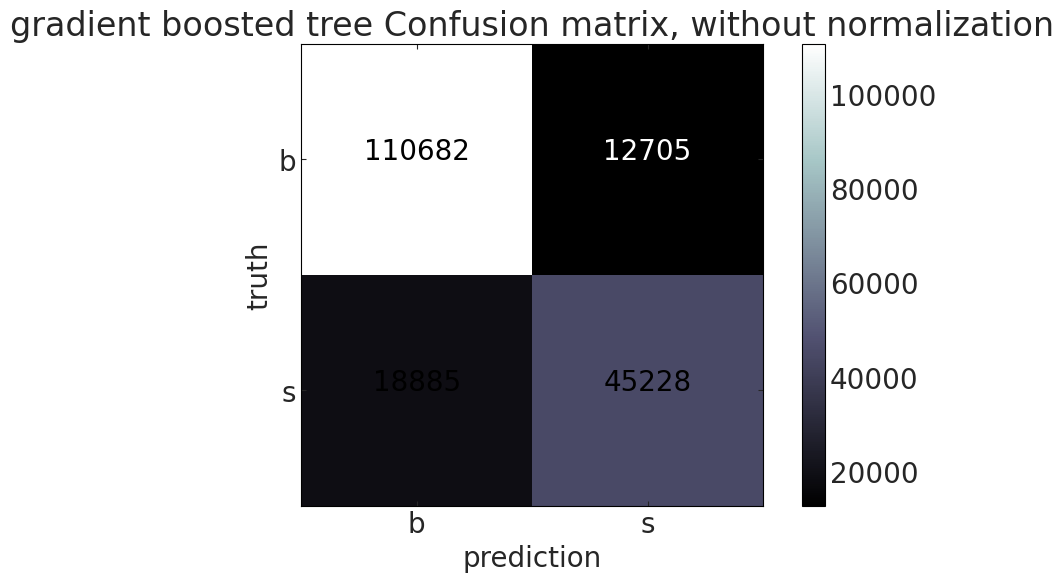

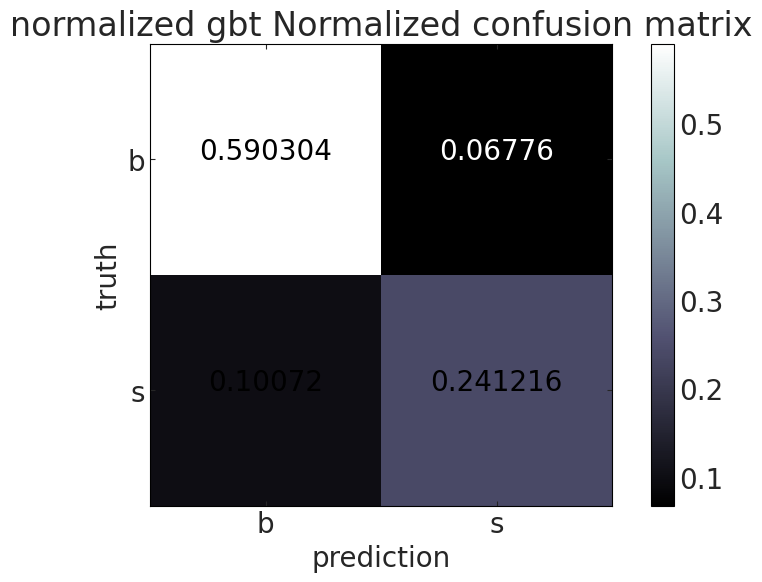

In [80]:
plot_confusion_matrix(gbt.predict(test_x), test_y, title="gradient boosted tree",labels = ['s', 'b'])
plot_confusion_matrix(gbt.predict(test_x), test_y, normalize=True,
                  title= "normalized gbt",labels = ['s', 'b'])

Figure 2. This plot shows the same thing as the previous -- a regular and a normalized confusion matrix. The difference here is that this one used a gradient boosted tree method, where there is a single line of trees in series. Each sequential tree learns and improves on the previous by using weights. The last tree is the one that determines the value. These matrices also show more elements on the diagonals. It shows a similar degree of accuracy to the previous random forest method.

In [ ]:
#do the same fo GBT, dont forget your captions!!

Plot a simple ROC curve for the RF and GBT models  a d describe it in a caption.

In [ ]:
test_y

,Label
119431,s
189338,b
11025,s
100626,s
53814,b
...,...
101589,b
150687,s
45955,b
79269,b


In [34]:
#this will be passed to the ROC function
test_y.values.reshape(-1, 1).flatten() == "s"


array([ True, False,  True, ..., False, False, False])

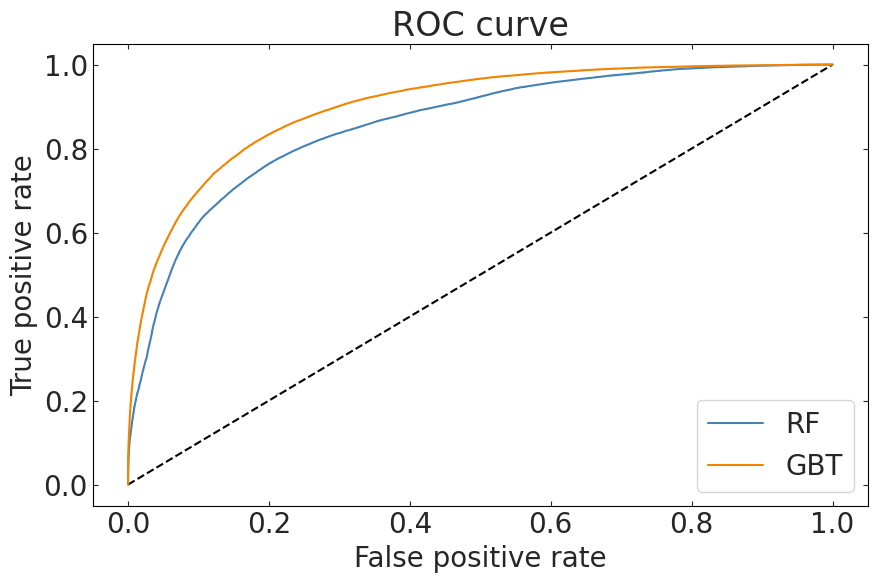

In [35]:
# The random forest model by itself
y_pred_grd_rfcat = rf.predict_proba(test_x)[:, 1]
y_pred_grd_gbtcat = gbt.predict_proba(test_x)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(test_y.values.reshape(-1, 1).flatten()=="s", y_pred_grd_rfcat)
fpr_gbt, tpr_gbt, _ = roc_curve(test_y.values.reshape(-1, 1).flatten()=="s", y_pred_grd_gbtcat)
#ADDED .values TO test_y
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_gbt, tpr_gbt, label='GBT')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


Figure 3. This is an ROC curve that plots the True vs False positive rates for both the RF and GBT methods. The plot can be used to compare different accuracy thresholds for the models. From this plot, it can be seen that the most efficient models would probably guess the correct answer 80% of the time with a 20% false positive. Both the RF and GBT methods are similar in their overall accuracy though. An ideal ROC curve would be much sharper and plateau much more quickly.

#Task 7 required for 661, EC for 461, tree-based regression


- Use a Random Forest and a Gradiend Boosted Tree Regressor model to predict the weight of the particles. Compare the model performance on training and test sets


In [36]:
rfR = RandomForestRegressor(max_depth=3, random_state=302)
rfR.fit(train_regress_x, train_regress_y)
gbtR = GradientBoostingRegressor(max_depth=3, random_state=302)
gbtR.fit(train_regress_x, train_regress_y)

KeyboardInterrupt: 

 Calculate the L2 and L1 loss functions for the fitted regression models (see slides for the definition) and discuss the results

In [ ]:
...

Ellipsis

In [ ]:

print(f"L1 RF {L1(test_regress_y,  rfR.predict(test_regress_x)):.2f}, L2 RF {L2(test_regress_y, rfR.predict(test_regress_x)):.2f}")

NameError: name 'L1' is not defined

In [ ]:
print(f"L1 GBT {L1(test_regress_y,  gbtR.predict(test_regress_x)):.2f}, L2 GBT {L2(test_regress_y, gbtR.predict(test_regress_x)):.2f}")

**Discuss!**

#Task 8: Choose between feature importance and grid optimization (due for both 461 and 661)







# Task 8a: feature importance
Use the "Titanic notebook" as a guide for the feature importance analysis  https://github.com/fedhere/DSPS_FBianco/blob/main/Labs/DSPS_2025_titanictree.ipynb

- For the Random Forest classifier, find the 4 most important features based on the simple unoptimized model you created earlier on. Use the documentation to find out what they are. We have not talked abotu the physics of this problem at all but the Kaggle challenge description should provide enogh information for you to comment on this result is somewhat superficially.

You can use ```rf.feature_importance_``` on the trained model to extract the relative importance of each feature (a number from 0 to 1) and then choose the features that have the 4 highest numbers (the numpy function ```argsort()``` is helpful here!)

(your features may looks slightly different than mine)

In [ ]:
...

In [37]:
print("Random Forest feature importance")
for f,fi in zip (higgsdata.columns, rf.feature_importances_):
  print (f, fi.round(2))

Random Forest feature importance
DER_mass_MMC 0.28
DER_mass_transverse_met_lep 0.23
DER_mass_vis 0.07
DER_pt_h 0.02
DER_deltaeta_jet_jet 0.05
DER_mass_jet_jet 0.03
DER_prodeta_jet_jet 0.0
DER_deltar_tau_lep 0.01
DER_pt_tot 0.0
DER_sum_pt 0.01
DER_pt_ratio_lep_tau 0.07
DER_met_phi_centrality 0.08
DER_lep_eta_centrality 0.03
PRI_tau_pt 0.07
PRI_tau_eta 0.0
PRI_tau_phi 0.0
PRI_lep_pt 0.01
PRI_lep_eta 0.0
PRI_lep_phi 0.0
PRI_met 0.01
PRI_met_phi 0.0
PRI_met_sumet 0.0
PRI_jet_num 0.0
PRI_jet_leading_pt 0.0
PRI_jet_leading_eta 0.0
PRI_jet_leading_phi 0.0
PRI_jet_subleading_pt 0.0
PRI_jet_subleading_eta 0.0
PRI_jet_subleading_phi 0.0
PRI_jet_all_pt 0.01


In [38]:
fistd = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
print("Random Forest feature importance")
for f, fi, s in zip (higgsdata.columns, rf.feature_importances_, fistd):
  print (f, fi.round(2), "+/-", s.round(2))

Random Forest feature importance
DER_mass_MMC 0.28 +/- 0.24
DER_mass_transverse_met_lep 0.23 +/- 0.24
DER_mass_vis 0.07 +/- 0.11
DER_pt_h 0.02 +/- 0.05
DER_deltaeta_jet_jet 0.05 +/- 0.09
DER_mass_jet_jet 0.03 +/- 0.06
DER_prodeta_jet_jet 0.0 +/- 0.01
DER_deltar_tau_lep 0.01 +/- 0.03
DER_pt_tot 0.0 +/- 0.01
DER_sum_pt 0.01 +/- 0.05
DER_pt_ratio_lep_tau 0.07 +/- 0.12
DER_met_phi_centrality 0.08 +/- 0.15
DER_lep_eta_centrality 0.03 +/- 0.07
PRI_tau_pt 0.07 +/- 0.13
PRI_tau_eta 0.0 +/- 0.0
PRI_tau_phi 0.0 +/- 0.0
PRI_lep_pt 0.01 +/- 0.02
PRI_lep_eta 0.0 +/- 0.0
PRI_lep_phi 0.0 +/- 0.0
PRI_met 0.01 +/- 0.04
PRI_met_phi 0.0 +/- 0.0
PRI_met_sumet 0.0 +/- 0.02
PRI_jet_num 0.0 +/- 0.01
PRI_jet_leading_pt 0.0 +/- 0.02
PRI_jet_leading_eta 0.0 +/- 0.01
PRI_jet_leading_phi 0.0 +/- 0.02
PRI_jet_subleading_pt 0.0 +/- 0.0
PRI_jet_subleading_eta 0.0 +/- 0.0
PRI_jet_subleading_phi 0.0 +/- 0.0
PRI_jet_all_pt 0.01 +/- 0.02


In [39]:
#filler = np.argsort(rf.feature_importances_)
best_features_index = np.argsort(rf.feature_importances_)

In [62]:
#higgsdata.drop(["EventId", "Label", "Weight"], axis=1).iloc[:, best_features_index[::-1]] #this sorts the data by feature
higgsdata.iloc[:, best_features_index[::-1]] #this sorts the data by feature

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_met_phi_centrality,DER_pt_ratio_lep_tau,DER_mass_vis,PRI_tau_pt,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_lep_eta_centrality,DER_pt_h,...,DER_pt_tot,PRI_jet_num,PRI_jet_subleading_eta,PRI_lep_eta,PRI_jet_subleading_phi,PRI_jet_subleading_pt,PRI_met_phi,PRI_lep_phi,PRI_tau_eta,PRI_tau_phi
0,138.470,51.655,1.396,1.582,97.827,32.638,0.91,124.711,0.2,27.980,...,41.928,2,1.24,2.273,-2.475,46.062,-0.277,-2.414,1.017,0.381
1,160.937,68.768,1.414,0.879,103.235,42.014,-999.00,-999.000,-999.0,48.146,...,2.078,1,-999.00,0.501,-999.000,-999.000,-1.916,0.103,2.039,-3.011
2,-999.000,162.172,1.414,3.776,125.953,32.154,-999.00,-999.000,-999.0,35.635,...,9.336,1,-999.00,-0.953,-999.000,-999.000,-2.186,1.052,-0.705,-2.093
3,143.905,81.417,-1.285,2.354,80.943,22.647,-999.00,-999.000,-999.0,0.414,...,0.414,0,-999.00,-0.522,-999.000,-999.000,0.060,-3.100,-1.655,0.010
4,175.864,16.915,-1.385,1.056,134.805,28.209,-999.00,-999.000,-999.0,16.405,...,16.405,0,-999.00,0.798,-999.000,-999.000,-0.871,1.569,-2.197,-2.231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,-999.000,71.989,-1.414,1.258,36.548,24.754,-999.00,-999.000,-999.0,5.042,...,5.042,0,-999.00,-0.950,-999.000,-999.000,2.859,0.380,-0.414,-0.905
249996,-999.000,58.179,-1.345,1.162,68.083,23.416,-999.00,-999.000,-999.0,22.439,...,22.439,0,-999.00,0.308,-999.000,-999.000,-0.867,1.042,-1.609,2.776
249997,105.457,60.526,0.529,1.202,75.839,35.636,-999.00,-999.000,-999.0,39.757,...,22.183,1,-999.00,0.381,-999.000,-999.000,-2.890,0.851,-0.266,-3.132
249998,94.951,19.362,1.414,0.999,68.812,27.944,-999.00,-999.000,-999.0,13.504,...,13.504,0,-999.00,-0.874,-999.000,-999.000,0.811,-0.296,-2.211,2.792


In [68]:
only4 = higgsdata.iloc[:, best_features_index[::-1]]
only4 = only4.iloc[:,:4]
only4

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_met_phi_centrality,DER_pt_ratio_lep_tau
0,138.470,51.655,1.396,1.582
1,160.937,68.768,1.414,0.879
2,-999.000,162.172,1.414,3.776
3,143.905,81.417,-1.285,2.354
4,175.864,16.915,-1.385,1.056
...,...,...,...,...
249995,-999.000,71.989,-1.414,1.258
249996,-999.000,58.179,-1.345,1.162
249997,105.457,60.526,0.529,1.202
249998,94.951,19.362,1.414,0.999


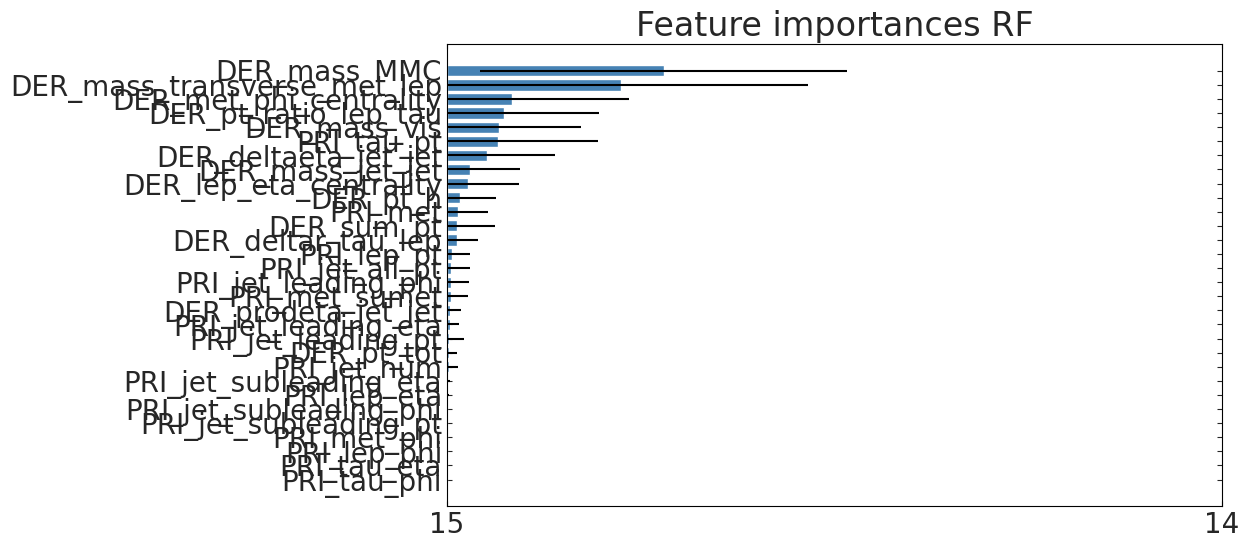

In [43]:
plt.figure()
plt.title("Feature importances RF")


indices = np.argsort(rf.feature_importances_)

pl.barh(np.arange(rf.feature_importances_.shape[0]),
        rf.feature_importances_[indices],
       xerr=fistd[indices], align="center")
pl.xticks(range(rf.feature_importances_.shape[0]), indices)
pl.yticks(range(rf.feature_importances_.shape[0]),
          labels=higgsdata.columns[indices])
pl.xlim(0, 1)
pl.show()

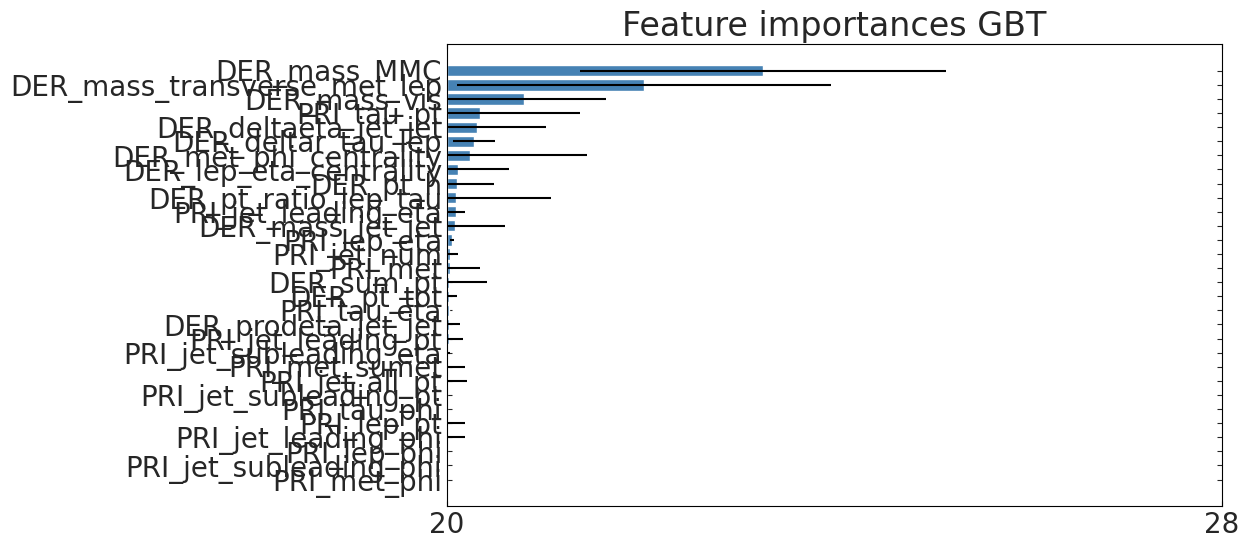

In [70]:
plt.figure()
plt.title("Feature importances GBT")


indices = np.argsort(gbt.feature_importances_)

pl.barh(np.arange(gbt.feature_importances_.shape[0]),
        gbt.feature_importances_[indices],
       xerr=fistd[indices], align="center")
pl.xticks(range(gbt.feature_importances_.shape[0]), indices)
pl.yticks(range(gbt.feature_importances_.shape[0]),
          labels=higgsdata.columns[indices])
pl.xlim(0, 1)
pl.show()

Figure 4. These two plots are bar graphs representing the feature importance of each variable in the data. Both the RF and GBT methods will have features that they calculate to be terminal or more important than the others. They will have an ordering, which is what is graphed here. Errorbars can be seen in black on the plot. Both methods estimate that Der_mass_MMC is the most important variable. This corresponds to the mass of the Higgs Boson Candidate. After the second value, the methods begin to diverge. This is helpful for finding good ways to classify the data, i.e. by weight.

In [73]:
rf.feature_importances_[:4]

array([0.29459185, 0.12127506, 0.09563805, 0.02163766])

In [ ]:
#higgsdata.iloc[:, best_features_index[::-1]] #this sorts the data by feature

This was my attempt to plot the four most significant values. I thought that was part of the assignment, but upon reading the directions, I guess it isn't. Either way I've still included it.

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

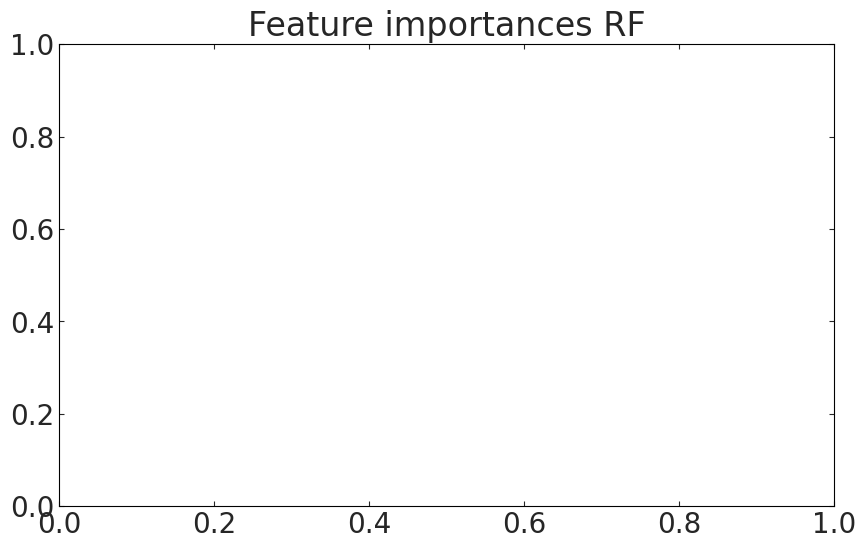

In [74]:




"""
plt.figure()
plt.title("Feature importances RF")


indices = np.argsort(rf.feature_importances_[:4])

pl.barh(np.arange(rf.feature_importances_[:4].shape[0]),
        rf.feature_importances_[:4][only4],
       xerr=fistd[only4], align="center")
pl.xticks(range(rf.feature_importances_[:4].shape[0]), only4)
pl.yticks(range(rf.feature_importances_[:4].shape[0]),
          labels=higgsdata.columns[only4])
pl.xlim(0, 1)
pl.show()
"""

# Task 8b: hyperparameters grid search
- Explore the parameter space with the sklearn module ```sklearn.model_selection.RandomizedSearchCV``` *fitting only those 4 features*

Follow this example to set up the parameter search. Set the estimators to 10 and 100, (the number of trees) and the max depth to 3, and 10, and None (let it be unconstrained). Set bootstrap to both True and False. Set the number of features to consider at every split to both "autp" and "sqrt". Use ```pprint``` like I did earlier in this notebook to print the parameters set

**this takes some computational time! so do not start this at the last minute!!**

In [44]:
# choose your preferred values for the parameters you will test
random_grid = {'n_estimators': [10, 100],
               'max_depth': [3, 10]}

In [46]:
print(random_grid)


{'n_estimators': [10, 100], 'max_depth': [3, 10]}


 mine and your best features do not necessarily have to be the same because our models may be different (different parameters, different random seed etc)

In [47]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation,
# search across 18 different combinations
random_search = RandomizedSearchCV(estimator = rf, param_distributions=random_grid,
                                   n_iter=1, cv=3)


Note that this may take a long time! It took 1 hour for me to run this. Dont start at the last minute!!

In [48]:
random_search.fit(train_x[::5], train_y[::5])
# subselecting every 5th observation to reduce the computational time

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=3,
                                                    random_state=344),
                   n_iter=1,
                   param_distributions={'max_depth': [3, 10],
                                        'n_estimators': [10, 100]})

In [49]:
random_search.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=10, random_state=344)

In [51]:
for k in random_search.best_params_:
  print(k,random_search.best_params_[k])

n_estimators 10
max_depth 10


In [52]:
rf = RandomForestClassifier(**random_search.best_params_)
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [53]:
rf.fit(train_x, train_y)

RandomForestClassifier(max_depth=10, n_estimators=10)

In [54]:
print("Tuned RF  Parameters: {}".format(random_search.best_params_))
print("Best score is {}".format(rf.score(test_x, test_y)))


Tuned RF  Parameters: {'n_estimators': 10, 'max_depth': 10}
Best score is 0.827376


In [55]:
df = pd.DataFrame(random_search.cv_results_) # this shows the result for the given parameters
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.316331,0.034076,0.010134,0.000961,10,10,"{'n_estimators': 10, 'max_depth': 10}",0.819774,0.809935,0.820691,0.8168,0.004869,1


Plot a simple  ROC curve for the RF model with the best parameters found in the previous step. Describe it. Compare it with the GBT model from before

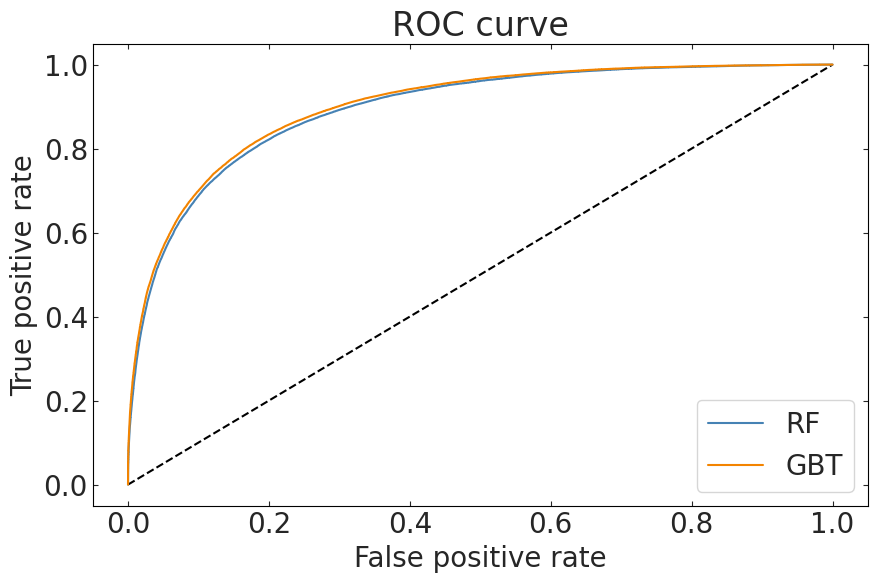

In [56]:
# The random forest model by itself
y_pred_grd_rfcat = rf.predict_proba(test_x)[:, 1]
y_pred_grd_gbtcat = gbt.predict_proba(test_x)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(test_y.values.reshape(-1, 1).flatten()=="s", y_pred_grd_rfcat)
fpr_gbt, tpr_gbt, _ = roc_curve(test_y.values.reshape(-1, 1).flatten()=="s", y_pred_grd_gbtcat)
#i had to use the .values function again here to make this work
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_gbt, tpr_gbt, label='GBT')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()